# Законы распределения дискретных случайных величин

Задание:
```
Тема 5. Законы распределения дискретных случайных величин
Привести примеры (сформулировать условие задачи, нельзя брать задачи из лекций и рассмотренные на практике из учебника) дискретных случайных величин  распределенных по 
биномиальному закону распределения 
закону распределения Пуассо а;
геометрическому закону распределе ия;
гипергеометрическому закону распределения.
Для каждой ДСВ составить закон распределения, найти математическое ожидание, дисперсию, среднее квадратическое отклонение и моду, отобразить многоугольник распредеения.
```

## Общие импорты и настройки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import comb
import pandas as pd

# Настройка отображения графиков
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 12
np.set_printoptions(precision=4, suppress=True)

## Биномиальное распределение

Задача 1. Вероятность того, что во время работы швейной машинки вылетит нитка и товар придётся "исправлять" равна 0,03. Найти закон распределения числа испорченных поло, математическое ожидание, дисперсию, среднее квадратическое отклонение и моду, а также построить пмногоугольник распределения, если поступил заказ на 8 поло с вышевкой:


ЗАДАЧА 1: Биномиальное распределение
Параметры: n = 8, p = 0.03, q = 0.97
СВ X - число испорченных поло среди 8

Закон распределения:
 k (брак)       P(X=k)  P(X=k) округл.
        0 7.837434e-01         0.78374
        1 1.939159e-01         0.19392
        2 2.099089e-02         0.02099
        3 1.298406e-03         0.00130
        4 5.019610e-05         0.00005
        5 1.241965e-06         0.00000
        6 1.920565e-08         0.00000
        7 1.697112e-10         0.00000
        8 6.561000e-13         0.00000

Числовые характеристики:
M(X) = n * p = 8 * 0.03 = 0.2400
D(X) = n * p * q = 8 * 0.03 * 0.97 = 0.2328
σ(X) = √D(X) = √0.2328 = 0.4825
Mo(X) = 0 (наиболее вероятное значение)


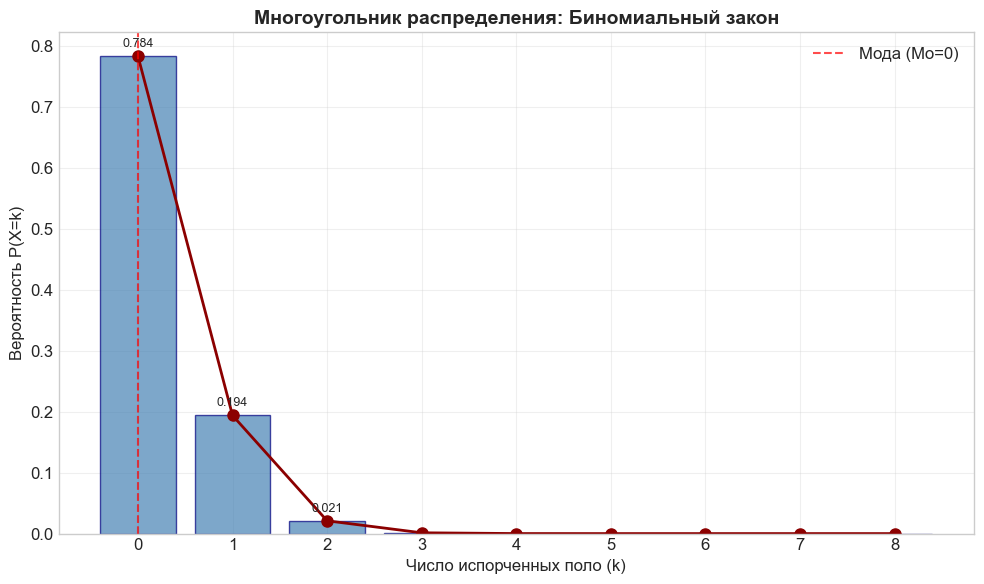

In [2]:
print("\n" + "="*60)
print("ЗАДАЧА 1: Биномиальное распределение")
print("="*60)

n_binom = 8
p_binom = 0.03
q_binom = 1 - p_binom

print(f"Параметры: n = {n_binom}, p = {p_binom}, q = {q_binom}")
print(f"СВ X - число испорченных поло среди {n_binom}")

k_values_binom = np.arange(0, n_binom + 1)
prob_binom = comb(n_binom, k_values_binom) * (p_binom**k_values_binom) * (q_binom**(n_binom - k_values_binom))

df_binom = pd.DataFrame({
    'k (брак)': k_values_binom,
    'P(X=k)': prob_binom,
    'P(X=k) округл.': np.round(prob_binom, 5)
})
print("\nЗакон распределения:")
print(df_binom.to_string(index=False))

M_binom = n_binom * p_binom
D_binom = n_binom * p_binom * q_binom
sigma_binom = np.sqrt(D_binom)

mode_idx = np.argmax(prob_binom)
Mo_binom = k_values_binom[mode_idx]

print("\nЧисловые характеристики:")
print(f"M(X) = n * p = {n_binom} * {p_binom} = {M_binom:.4f}")
print(f"D(X) = n * p * q = {n_binom} * {p_binom} * {q_binom} = {D_binom:.4f}")
print(f"σ(X) = √D(X) = √{D_binom:.4f} = {sigma_binom:.4f}")
print(f"Mo(X) = {Mo_binom} (наиболее вероятное значение)")

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(k_values_binom, prob_binom, alpha=0.7, color='steelblue', edgecolor='navy')
ax1.plot(k_values_binom, prob_binom, 'o-', color='darkred', linewidth=2, markersize=8)

ax1.set_title('Многоугольник распределения: Биномиальный закон', fontsize=14, fontweight='bold')
ax1.set_xlabel('Число испорченных поло (k)', fontsize=12)
ax1.set_ylabel('Вероятность P(X=k)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_values_binom)
ax1.axvline(x=Mo_binom, color='red', linestyle='--', alpha=0.7, label=f'Мода (Mo={Mo_binom})')
ax1.legend()

for k, prob in zip(k_values_binom, prob_binom):
    if prob > 0.01:  # Подписываем только значимые вероятности
        ax1.text(k, prob + 0.01, f'{prob:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Распределение Пуассона

Задача 2. Число заказов, поступающих на производство в течение часа, является случайной величиной $X$, распределённой по закону Пуассона. Среднее число заказов за час (параметр распределения) $\lambda = 3$. Требуется:
- Составить закон распределения случайной величины $X$
- Найти математическое ожидание, дисперсию, среднее квадратическое отклонение и моду
- Построить многоугольник распределения


ЗАДАЧА 2: Распределение Пуассона
Параметр распределения: λ = 3
СВ X - число заказов, поступивших за час

Закон распределения (первые 10 значений):
 k (заказы)   P(X=k)  P(X=k) округл.
          0 0.049787         0.04979
          1 0.149361         0.14936
          2 0.224042         0.22404
          3 0.224042         0.22404
          4 0.168031         0.16803
          5 0.100819         0.10082
          6 0.050409         0.05041
          7 0.021604         0.02160
          8 0.008102         0.00810
          9 0.002701         0.00270
... и т.д. (всего 10 значений)

Числовые характеристики:
M(X) = λ = 3
D(X) = λ = 3
σ(X) = √λ = √3 = 1.7321
Mo(X) = 3 и 2


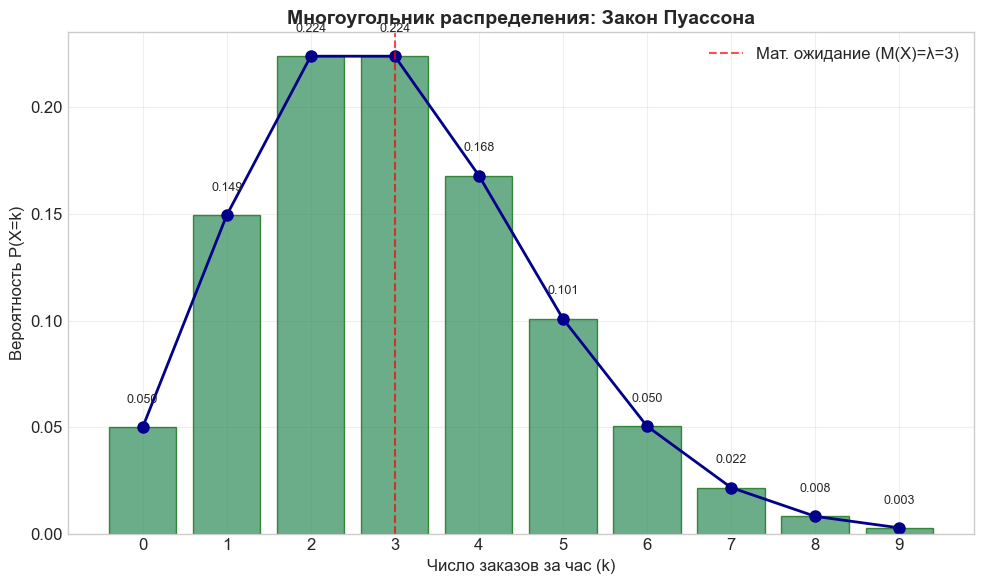

In [7]:
print("\n" + "="*60)
print("ЗАДАЧА 2: Распределение Пуассона")
print("="*60)

lambda_poisson = 3
print(f"Параметр распределения: λ = {lambda_poisson}")
print("СВ X - число заказов, поступивших за час")

max_k_poisson = int(lambda_poisson + 4 * np.sqrt(lambda_poisson))
k_values_poisson = np.arange(0, max_k_poisson + 1)
prob_poisson = stats.poisson.pmf(k_values_poisson, lambda_poisson)

df_poisson = pd.DataFrame({
    'k (заказы)': k_values_poisson,
    'P(X=k)': prob_poisson,
    'P(X=k) округл.': np.round(prob_poisson, 5)
})
print("\nЗакон распределения (первые 10 значений):")
print(df_poisson.head(10).to_string(index=False))
print(f"... и т.д. (всего {len(k_values_poisson)} значений)")

M_poisson = lambda_poisson
D_poisson = lambda_poisson
sigma_poisson = np.sqrt(D_poisson)

if str(lambda_poisson).isdigit():
    Mo_poisson1 = int(lambda_poisson)
    Mo_poisson2 = int(lambda_poisson) - 1
    Mo_str = f"{Mo_poisson1} и {Mo_poisson2}"
else:
    Mo_poisson = int(lambda_poisson)  # целая часть λ
    Mo_str = str(Mo_poisson)

print("\nЧисловые характеристики:")
print(f"M(X) = λ = {M_poisson}")
print(f"D(X) = λ = {D_poisson}")
print(f"σ(X) = √λ = √{lambda_poisson} = {sigma_poisson:.4f}")
print(f"Mo(X) = {Mo_str}")

fig2, ax2 = plt.subplots(figsize=(10, 6))
bars2 = ax2.bar(k_values_poisson, prob_poisson, alpha=0.7, color='seagreen', edgecolor='darkgreen')
ax2.plot(k_values_poisson, prob_poisson, 'o-', color='darkblue', linewidth=2, markersize=8)

ax2.set_title('Многоугольник распределения: Закон Пуассона', fontsize=14, fontweight='bold')
ax2.set_xlabel('Число заказов за час (k)', fontsize=12)
ax2.set_ylabel('Вероятность P(X=k)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_values_poisson)

ax2.axvline(x=lambda_poisson, color='red', linestyle='--', alpha=0.7, 
            label=f'Мат. ожидание (M(X)=λ={lambda_poisson})')
ax2.legend()

for k, prob in zip(k_values_poisson[:10], prob_poisson[:10]):  
    if prob > 0.001:
        ax2.text(k, prob + 0.01, f'{prob:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Геометрическое распределение

Задача 3. На производстве находится аппарат для печати на кружках методом термотрансфера. Вероятность того, что принт на кружке окажется "смазанным" равна 0.01. Мастер последовательно проверяет каждую кружку. Случайная величина $X$ - номер первой проверенной кружки со "смазанным" принтом. Требуется:
- Составить закон распределения случайной величины $X$
- Найти математическое ожидание, дисперсию, среднее квадратическое отклонение и моду
- Построить многоугольник распределения


ЗАДАЧА 3: Геометрическое распределение
Параметры: p = 0.01, q = 0.99
СВ X - номер первой кружки со смазанным принтом

Закон распределения (первые 15 значений):
 k (номер кружки)   P(X=k)  P(X=k) округл.
                1 0.010000        0.010000
                2 0.009900        0.009900
                3 0.009801        0.009801
                4 0.009703        0.009703
                5 0.009606        0.009606
                6 0.009510        0.009510
                7 0.009415        0.009415
                8 0.009321        0.009321
                9 0.009227        0.009227
               10 0.009135        0.009135
               11 0.009044        0.009044
               12 0.008953        0.008953
               13 0.008864        0.008864
               14 0.008775        0.008775
               15 0.008687        0.008687
... и т.д. (всего 300 значений в расчёте)

Числовые характеристики:
M(X) = 1/p = 1/0.01 = 100.00
D(X) = q/p² = 0.99/0.000100 = 9900.00
σ(X) = √D(X) = √

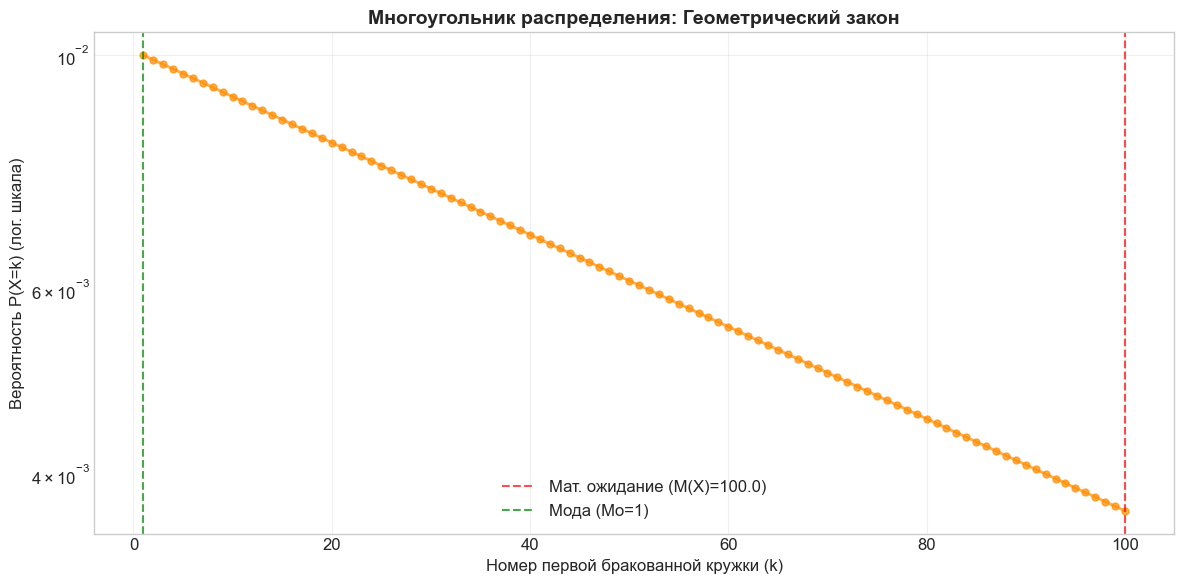

In [8]:
print("\n" + "="*60)
print("ЗАДАЧА 3: Геометрическое распределение")
print("="*60)

p_geom = 0.01
q_geom = 1 - p_geom
print(f"Параметры: p = {p_geom}, q = {q_geom}")
print("СВ X - номер первой кружки со смазанным принтом")

max_k_geom = min(300, int(np.ceil(np.log(0.0001) / np.log(q_geom))))
k_values_geom = np.arange(1, max_k_geom + 1)
prob_geom = q_geom**(k_values_geom - 1) * p_geom

df_geom = pd.DataFrame({
    'k (номер кружки)': k_values_geom[:15],
    'P(X=k)': prob_geom[:15],
    'P(X=k) округл.': np.round(prob_geom[:15], 6)
})
print("\nЗакон распределения (первые 15 значений):")
print(df_geom.to_string(index=False))
print(f"... и т.д. (всего {len(k_values_geom)} значений в расчёте)")

M_geom = 1 / p_geom
D_geom = q_geom / (p_geom**2)
sigma_geom = np.sqrt(D_geom)
Mo_geom = 1  

print("\nЧисловые характеристики:")
print(f"M(X) = 1/p = 1/{p_geom} = {M_geom:.2f}")
print(f"D(X) = q/p² = {q_geom}/{p_geom**2:.6f} = {D_geom:.2f}")
print(f"σ(X) = √D(X) = √{D_geom:.2f} = {sigma_geom:.2f}")
print(f"Mo(X) = {Mo_geom} (всегда 1 для геометрического распределения)")

fig3, ax3 = plt.subplots(figsize=(12, 6))

k_for_plot = min(100, len(k_values_geom))
ax3.plot(k_values_geom[:k_for_plot], prob_geom[:k_for_plot], 'o-', 
         color='darkorange', linewidth=2, markersize=5, alpha=0.7)

ax3.set_title('Многоугольник распределения: Геометрический закон', fontsize=14, fontweight='bold')
ax3.set_xlabel('Номер первой бракованной кружки (k)', fontsize=12)
ax3.set_ylabel('Вероятность P(X=k)', fontsize=12)
ax3.grid(True, alpha=0.3)

ax3.axvline(x=M_geom, color='red', linestyle='--', alpha=0.7, 
            label=f'Мат. ожидание (M(X)={M_geom:.1f})')
ax3.axvline(x=Mo_geom, color='green', linestyle='--', alpha=0.7, 
            label=f'Мода (Mo={Mo_geom})')
ax3.legend()

ax3.set_yscale('log')
ax3.set_ylabel('Вероятность P(X=k) (лог. шкала)')

plt.tight_layout()
plt.show()

## Гипергеометрическое распределение

Задача 4. С конвейера сняли партию из $N=30$ кружек, уложенных в коробку. Мастер знает, что в этой партии $M=5$ кружек имеют скол на ручке. Наугад из коробки выбирают $n=8$ кружек для детального осмотра. Случайная величина $X$ - число дефектных кружек в отобранных. Требуется:
- Составить закон распределения случайной величины $X$
- Найти математическое ожидание, дисперсию, среднее квадратическое отклонение и моду
- Построить многоугольник распределения


ЗАДАЧА 4: Гипергеометрическое распределение
Параметры: N = 30, M = 5, n = 8
СВ X - число дефектных кружек в выборке из 8

Закон распределения:
 k (дефектные)   P(X=k)  P(X=k) округл.
             0 0.184792         0.18479
             1 0.410649         0.41065
             2 0.302584         0.30258
             3 0.090775         0.09078
             4 0.010807         0.01081
             5 0.000393         0.00039

Числовые характеристики:
M(X) = n * (M/N) = 8 * (5/30) = 1.3333
D(X) = n * (M/N) * ((N-M)/N) * ((N-n)/(N-1)) = 0.8429
σ(X) = √D(X) = √0.8429 = 0.9181
Mo(X) = 1 (наиболее вероятное значение)


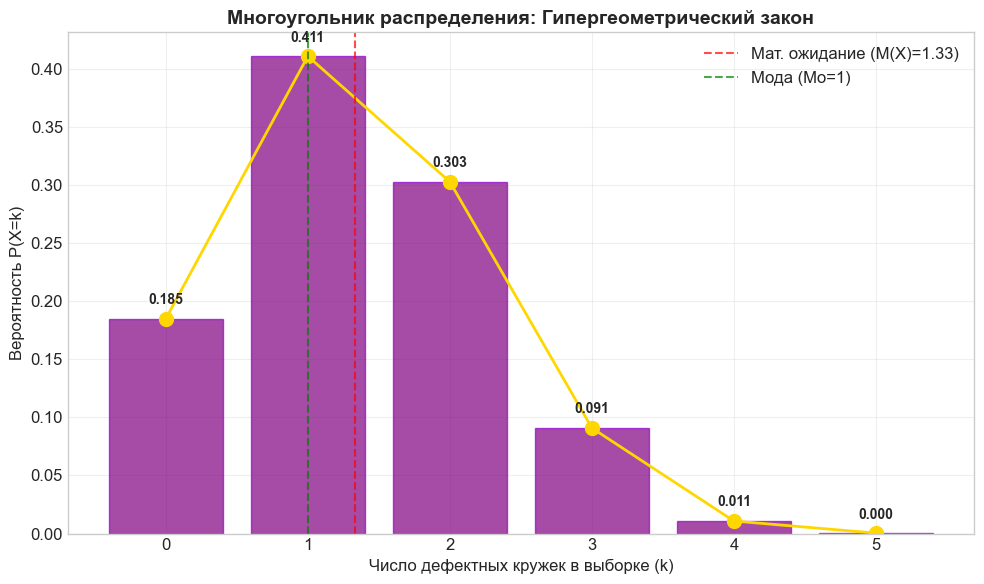

In [9]:
print("\n" + "="*60)
print("ЗАДАЧА 4: Гипергеометрическое распределение")
print("="*60)

N_hyper = 30  
M_hyper = 5   
n_hyper = 8   
print(f"Параметры: N = {N_hyper}, M = {M_hyper}, n = {n_hyper}")
print(f"СВ X - число дефектных кружек в выборке из {n_hyper}")

k_min = max(0, n_hyper - (N_hyper - M_hyper))
k_max = min(n_hyper, M_hyper)
k_values_hyper = np.arange(k_min, k_max + 1)

prob_hyper = []
for k in k_values_hyper:
    # C(M, k) * C(N-M, n-k) / C(N, n)
    prob = comb(M_hyper, k) * comb(N_hyper - M_hyper, n_hyper - k) / comb(N_hyper, n_hyper)
    prob_hyper.append(prob)

prob_hyper = np.array(prob_hyper)

df_hyper = pd.DataFrame({
    'k (дефектные)': k_values_hyper,
    'P(X=k)': prob_hyper,
    'P(X=k) округл.': np.round(prob_hyper, 5)
})
print("\nЗакон распределения:")
print(df_hyper.to_string(index=False))

M_hyper_calc = n_hyper * (M_hyper / N_hyper)
D_hyper = n_hyper * (M_hyper/N_hyper) * ((N_hyper-M_hyper)/N_hyper) * ((N_hyper-n_hyper)/(N_hyper-1))
sigma_hyper = np.sqrt(D_hyper)

mode_idx_hyper = np.argmax(prob_hyper)
Mo_hyper = k_values_hyper[mode_idx_hyper]

print("\nЧисловые характеристики:")
print(f"M(X) = n * (M/N) = {n_hyper} * ({M_hyper}/{N_hyper}) = {M_hyper_calc:.4f}")
print(f"D(X) = n * (M/N) * ((N-M)/N) * ((N-n)/(N-1)) = {D_hyper:.4f}")
print(f"σ(X) = √D(X) = √{D_hyper:.4f} = {sigma_hyper:.4f}")
print(f"Mo(X) = {Mo_hyper} (наиболее вероятное значение)")

fig4, ax4 = plt.subplots(figsize=(10, 6))
bars4 = ax4.bar(k_values_hyper, prob_hyper, alpha=0.7, color='purple', edgecolor='darkviolet')
ax4.plot(k_values_hyper, prob_hyper, 'o-', color='gold', linewidth=2, markersize=10)

ax4.set_title('Многоугольник распределения: Гипергеометрический закон', fontsize=14, fontweight='bold')
ax4.set_xlabel('Число дефектных кружек в выборке (k)', fontsize=12)
ax4.set_ylabel('Вероятность P(X=k)', fontsize=12)
ax4.grid(True, alpha=0.3)
ax4.set_xticks(k_values_hyper)

ax4.axvline(x=M_hyper_calc, color='red', linestyle='--', alpha=0.7, 
            label=f'Мат. ожидание (M(X)={M_hyper_calc:.2f})')
ax4.axvline(x=Mo_hyper, color='green', linestyle='--', alpha=0.7, 
            label=f'Мода (Mo={Mo_hyper})')
ax4.legend()

for k, prob in zip(k_values_hyper, prob_hyper):
    ax4.text(k, prob + 0.01, f'{prob:.3f}', ha='center', va='bottom', fontsize=10, 
             fontweight='bold')

plt.tight_layout()
plt.show()